<img src="images/seemapldbig.png">

# ***Please wait for instructor and don't skip ahead during the workshop!***

# ***Python packages we will need in this notebook***

In [64]:
# Some standard imports
import math
import warnings

# prevent "chatty" warnings
warnings.filterwarnings("ignore", category=UserWarning)

# import torch and specify an "accelerator" backend
import torch
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    print("Found mps backend")
    default_device(torch.device("mps"))
else:
    print("Using cpu backend")
    default_device(torch.device("cpu"))
    
# import fastai
from fastai.vision.all import *
  

Using cpu backend


# ***Let's get the dataset***

In [38]:
# FastAI provides a bunch of commonly used datasets
# MNIST is a famous dataset of images of digits used in 
# ML intro classes just like this one.  It's small and fast to train!

path = untar_data(URLs.MNIST)
print(path)

/Users/gwilliams/.fastai/data/mnist_png


In [55]:
# Let's look at the contents of that directory
!ls {path}

testing  training


# ***Let's load the data...***

In [15]:
# Ignore this for now.  It will be more obvious whyt it's 
# important in a few cells down!

block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label)


# ***Leverage FastAI's "datalaoder" to load all the images***

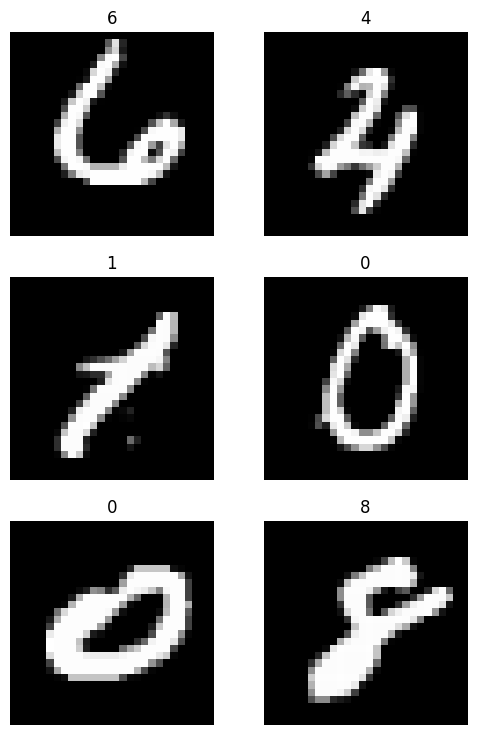

In [17]:
img_loader = block.dataloaders(path/"training")
print("Done.")

# Let's randomly sample some of the 'training' images...

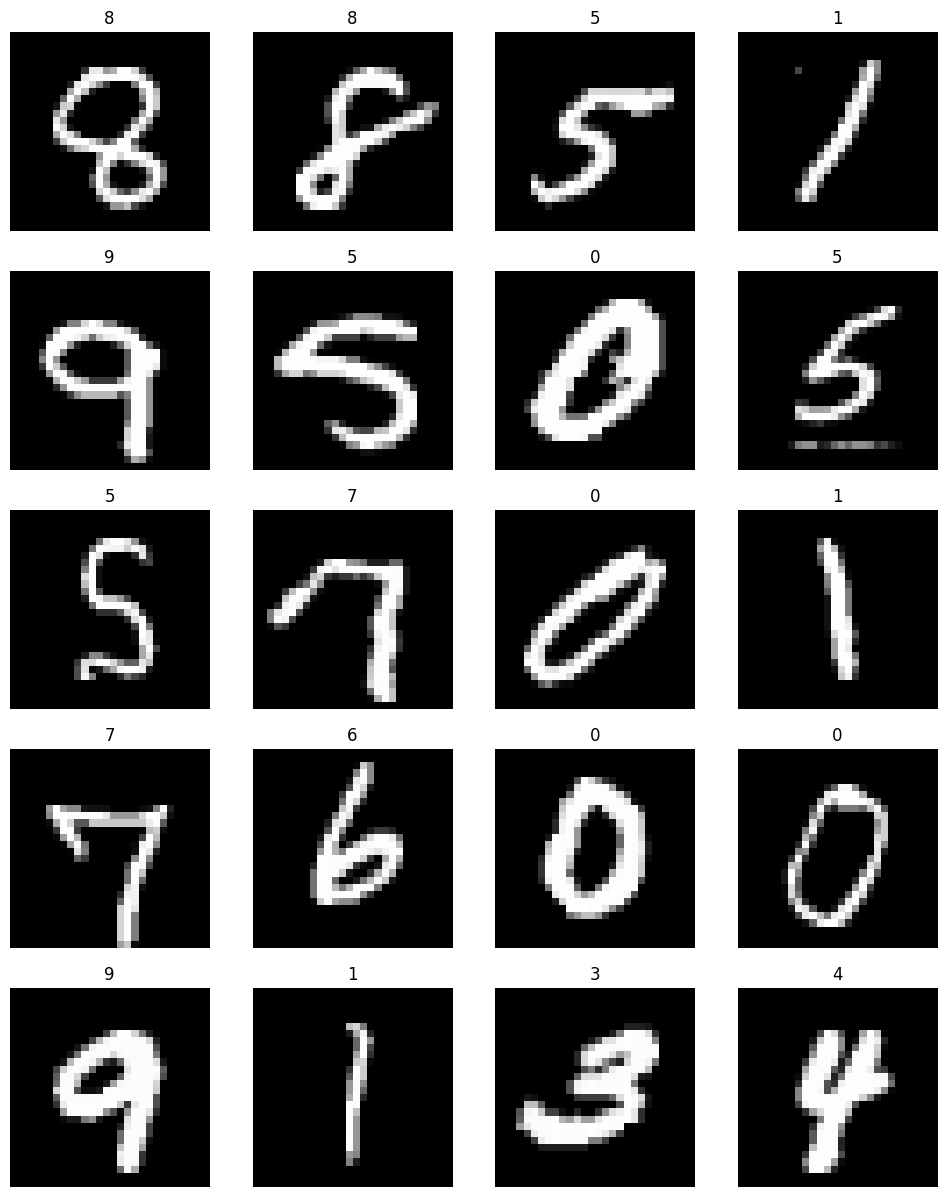

In [57]:
img_loader.train.show_batch(max_n=20, nrows=5)

# ***Let's prepare a neural network for training...***

In [58]:
# create a fastai learning with the CNN model called 'squeezenet'
learner = vision_learner(loaders, 
                         squeezenet1_0, # <-Yikes!  What is that?
                         metrics=accuracy)
print("Done.")

Done.


# ***Let's discuss the model before we train it...***



# ***Remember the perceptron and 1 fully-connected layer***...

<img src="images/perc_mlp.jpg" width=700>

# ***A Convolutional Neural Net has that and so much more...***
<img src="images/cnn-intro.jpeg" width=700>

# ***So, what is "SqueezeNet"?***

In [33]:
learner.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 96 x 11 x 11   
Conv2d                                    14208      False     
ReLU                                                           
____________________________________________________________________________
                     64 x 96 x 5 x 5     
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 16 x 5 x 5     
Conv2d                                    1552       False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 5 x 5     
Conv2d                                    1088       False     
ReLU                                                           
Conv2d                                    9280

# ***There are over 300 Pre-trained Convolutional Neural Network Models that a freely available for torch and fastai.***

# ***Only a few are geared for "edge" AI ( ie, low number of parameters.) "SqueezeNet" is one of them!***

# ***Now let's train (transfer-learn or fine-tune) this neural network for one "epoch"***

In [61]:
# use fastai's awesome learning algorithm for 1 "epoch"
learner.fit_one_cycle(2)

print("Done.")

epoch,train_loss,valid_loss,accuracy,time
0,0.546634,0.982017,0.874750,01:44
1,0.479701,1.014369,0.883667,01:46


Done.


# ***Exercise***

### -&emsp;Go back and train for 2 epochs.  Did accuracy improve?

# ***Summary***

### -&emsp;Transfer learning makes faster training possible

### -&emsp;Data loaders make your life easy!

### -&emsp;Lots of one-liners make the easy things easy

### -&emsp;The Pytorch layer is always there to make the hard things possible


# ***Let's grab the model and save it to a file...***

In [66]:
pytorch_model = learner.model.eval()
torch.save(pytorch_model, "my_fastai_mnist.pt")

print("Done.")

Done.


<img src="images/nano.jpg">

# ***Now let's upload to a nano and do a predicion speed test***

In [169]:
!./test_model_speed_on_nano.sh my_fastai_mnist.pt

Copying your model to nano...
my_fastai_mnist.pt                            100% 4998KB   4.2MB/s   00:01    
Running model speed test on nano...
Initializing nano model speed test on 'my_fastai_mnist.pt'...
Found test images...
Found model to test...
Importing ml packages...
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Preparing images...
Loading model file my_fastai_mnist.pt
Starting inference speed test...
prediction rate= 70.59323117689065
prediction rate= 73.47086207243396
prediction rate= 73.73861534067431
prediction rate= 72.0704602429466
prediction rate= 72.20796482613132
prediction rate= 74.66455274844832
prediction rate= 73.00936199633016
prediction rate= 74.00616962860164
prediction rate= 72.515115101527
Timing test done.
Connection to 192.168.1.9 clo

# ***Advanced Topics:***

### -&emsp;Why do you need more than one epoch?

### -&emsp;Loss functions and optimizers.

### -&emsp;Data augmentation.

    